# Get stock market data & clean data

In [1]:
%matplotlib inline
import yfinance as yf
import quantstats as qs
import numpy as np
import pandas as pd
# extend pandas functionality with metrics, etc.
qs.extend_pandas()

In [2]:
# Names of intersted stocks
stock_names = {'BHP.AX',
               'FMG.AX',
               'ABBV',
               'PFE',
               'BAC',
               'COKE',
               'SQ',
               'AAPL',
               'AMD',
               'FDX',
               'EBAY',
               'AMZN',
               'C',
               'F',
               'GDX',
               'USO'}

In [3]:
# Get a list of all closing prices
stock_list = {}

for stock in stock_names:
    
    stock_list[stock] = qs.utils.download_returns(stock)

    

    
# Limit all close prices to the last 10 years 
close_all = []

for name in stock_names:
    
    close_new = stock_list[name].loc["2011-01-01" :]
    
    close_all.append(close_new)
    
    
    
    
# Convert close prices to dataframe
df = pd.DataFrame(close_all[:]).T
df.columns = stock_names

display(df)

EBAY         F      ABBV       FDX       BAC        SQ  \
Date                                                                     
2011-01-03  0.030543  0.027397       NaN  0.001935  0.063718       NaN   
2011-01-04 -0.007322  0.007536       NaN -0.000751  0.003524       NaN   
2011-01-05  0.009133  0.029344       NaN  0.008054  0.018258       NaN   
2011-01-06 -0.010790  0.018446       NaN -0.008203 -0.004138       NaN   
2011-01-07 -0.025334  0.002744       NaN  0.000537 -0.013158       NaN   
...              ...       ...       ...       ...       ...       ...   
2021-08-19  0.000000 -0.025385  0.005457 -0.019064 -0.014710 -0.008896   
2021-08-20  0.007277 -0.007893  0.007547 -0.003775  0.004479  0.022149   
2021-08-23 -0.002181  0.012729  0.004545  0.001313  0.013376  0.028094   
2021-08-24 -0.004918  0.027494  0.002681  0.003410  0.013933 -0.000998   
2021-08-25       NaN       NaN       NaN       NaN       NaN       NaN   

              FMG.AX    BHP.AX      AAPL       PFE       AMD      COKE  \
Date                                                                     
2011-01-03       NaN       NaN  0.021732  0.009709  0.035452  0.024649   
2011-01-04 -0.013761  0.009282  0.005219  0.017534  0.035419 -0.008955   
2011-01-05 -0.007752 -0.014452  0.008180  0.006670  0.015963  0.004607   
2011-01-06  0.032812  0.002888 -0.000808  0.003865 -0.024691 -0.011287   
2011-01-07 -0.006051 -0.011520  0.007161  0.008801  0.016111 -0.001070   
...              ...       ...       ...       ...       ...       ...   
2021-08-19 -0.061539 -0.063522  0.002323 -0.010343  0.002513 -0.003641   
2021-08-20  0.011426 -0.007387  0.010157 -0.001639  0.009161  0.010712   
2021-08-23 -0.042731  0.002706  0.010257  0.024836  0.039369 -0.002494   
2021-08-24  0.013853  0.010346 -0.000601 -0.031043 -0.010297 -0.006050   
2021-08-25  0.026316  0.012467       NaN       NaN       NaN       NaN   

                AMZN       USO         C       GDX  
Date                                                
2011-01-03  0.023444  0.001282  0.035941 -0.011388  
2011-01-04  0.004288 -0.024840  0.000000 -0.028797  
2011-01-05  0.013026  0.011555  0.014285 -0.013555  
2011-01-06 -0.008324 -0.021807 -0.004024 -0.025421  
2011-01-07 -0.001991 -0.000265 -0.002020  0.000000  
...              ...       ...       ...       ...  
2021-08-19 -0.004208 -0.013877 -0.017998 -0.016831  
2021-08-20  0.003827 -0.029931  0.005871 -0.003553  
2021-08-23  0.020600  0.055722  0.009110  0.041167  
2021-08-24  0.012220  0.033152  0.016222 -0.000311  
2021-08-25       NaN       NaN       NaN       NaN  

[2747 rows x 16 columns]

In [12]:
# Get a list of all closing prices
sharpe_ratio = []
expected_return = []

for ticker in stock_names: 
    
    stk = qs.utils.download_returns(ticker)  
    
    # Sharpe Ratio
    sharpe = stk.sharpe()  
    sharpe_ratio.append(sharpe)
    
    # Expected return
    expt_rtrn = stk.expected_return()
    expected_return.append(expt_rtrn)
    

    

In [26]:
metrics_df = pd.DataFrame({"SharpeRatio": sharpe_ratio,
                           "ExpectedReturn": expected_return},
                          index=stock_names)

metrics_df.head(20)

SharpeRatio  ExpectedReturn
EBAY       0.632585        0.000782
F          0.397122        0.000310
ABBV       0.798820        0.000728
FDX        0.562162        0.000528
BAC        0.363728        0.000263
SQ         1.253817        0.002091
FMG.AX     0.878337        0.001603
BHP.AX     0.702575        0.000709
AAPL       0.626826        0.000712
PFE        0.548602        0.000449
AMD        0.441398        0.000338
COKE       0.438704        0.000366
AMZN       0.812734        0.001217
USO       -0.238706       -0.000630
C          0.324747        0.000197
GDX        0.204082       -0.000014

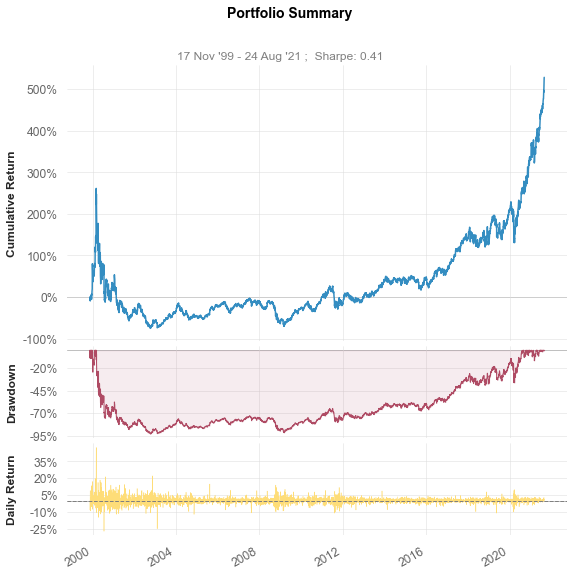

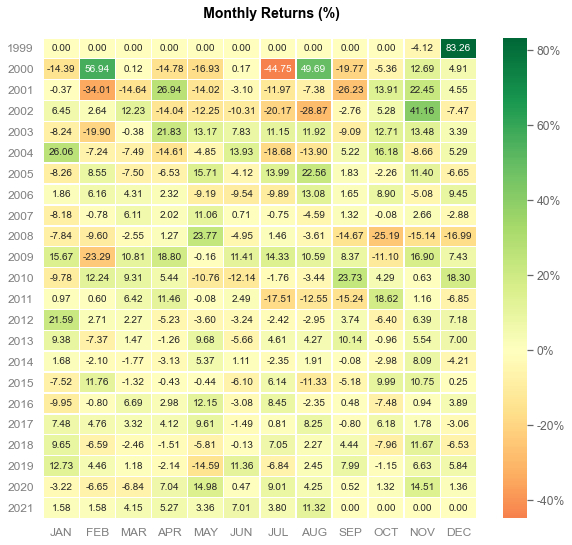

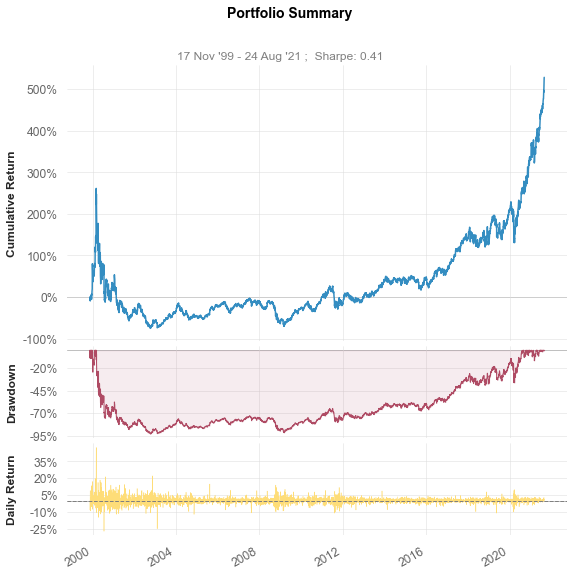

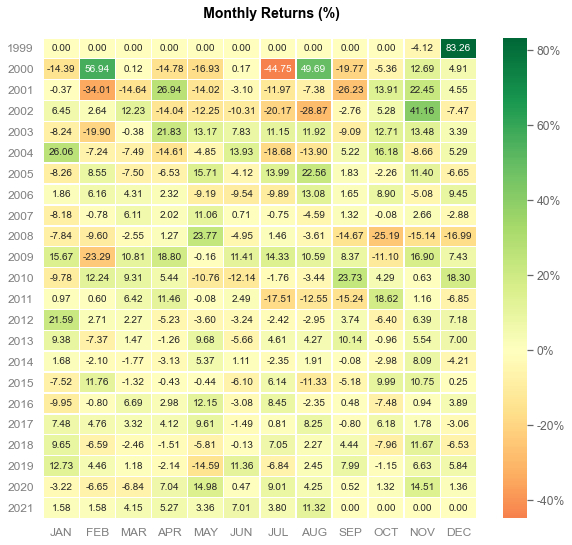

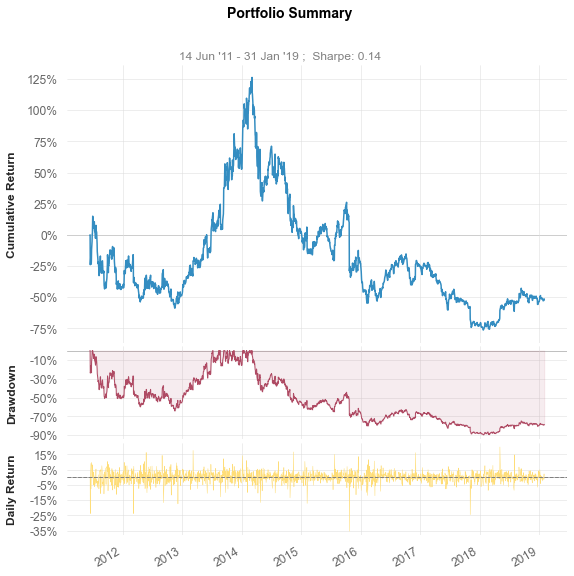

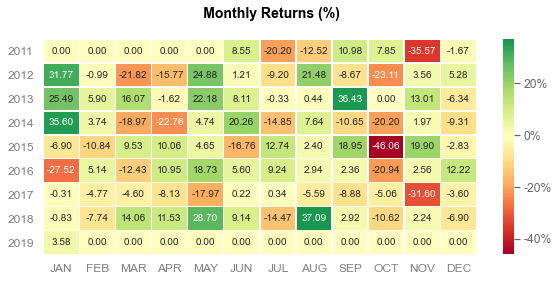

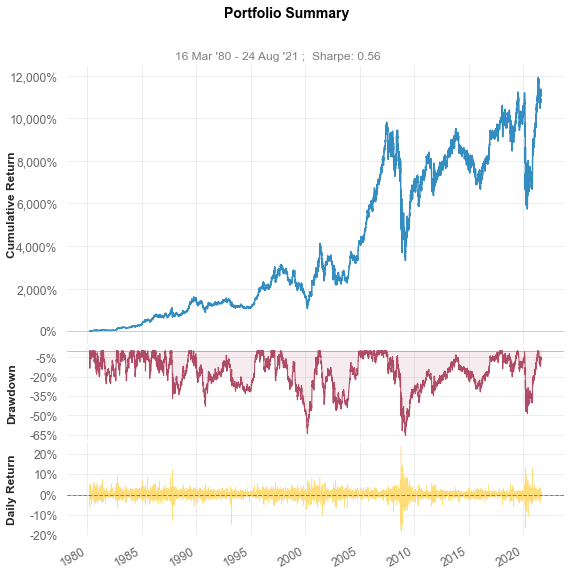

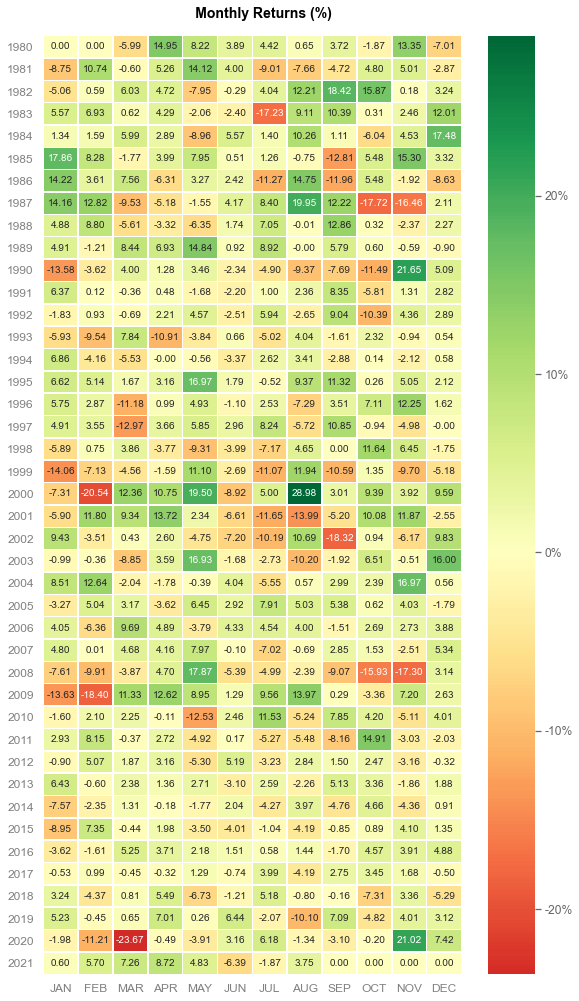

In [36]:
# Generate plots
stock_n = "AAPL"

for ticker in stock_n: 
    
    stk = qs.utils.download_returns(ticker)  
    
    #img = qs.plots.snapshot(stk, title=f"Stock name: {ticker}")
    
    #qs.reports.metrics(stk, mode="full")

    qs.reports.plots(stk)